---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Installing & Importing Libraries**](#Section2)<br>
  - **2.1** [**Installing Libraries**](#Section21)
  - **2.2** [**Importing Libraries**](#Section22)

**3.** [**Data Acquisition & Description**](#Section3)<br>
  - **3.1** [**Data Acquisition**](#Section31)
  - **3.2** [**Data Description**](#Section32)

**4.** [**Exploring Basic Dataframe Functions**](#Section4)<br>
**5.** [**Data Pre-processing**](#Section5)<br>
**6.** [**Exploratory Data Analysis**](#Section6)<br>
**7.** [**Conclusion**](#Section7)<br>

---
<a name=Section1></a>
# **1. Introduction**
---

-  PySpark is an **interface for Apache Spark** in Python.

- It not only allows you to write Spark applications using Python APIs, but also provides the PySpark shell for **interactively analyzing** your data in a **distributed environment**.

- PySpark supports most of Spark’s features such as **Spark SQL, DataFrame, Streaming, MLlib** (Machine Learning) and **Spark Core**.

- In this case study, we will look into **creating a basic spark cluster**, **importing some data**, **check the various dataframe functionalities**, and **perform EDA** on the data using PySpark.

---
<a name = Section2></a>
# **2. Installing & Importing Libraries**
---

<a name = Section21></a>
### **2.1 Installing Libraries**

- Installing **PySpark** and **HandySpark** libraries:

In [2]:
import findspark
findspark.init()

In [3]:

!pip install -q handyspark

<a name = Section22></a>
### **2.2 Importing Libraries**

In [4]:
#-------------------------------------------------------------------------------------------------------------------------------
from pyspark import SparkContext                                    # Importing SparkContext
from pyspark.sql import SparkSession, Window, Row                   # Importing importing methods for creating a cluster
from pyspark.sql import functions as F                              # Importing SQL Functions
from pyspark.sql.functions import col, isnan, when, count           # Importing relevant dataframe functions
from pyspark.sql.functions import *                                 # Importing inbuilt SQL Functions
from pyspark.sql.types import *                                     # Importing SQL types
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Popular plotting library
%matplotlib inline                                                  # To plot graphs inline the notebook
import seaborn as sns                                               # Advanced plotting library
from handyspark import *                                            # Helper library to plot graphs
#-------------------------------------------------------------------------------------------------------------------------------
from pyspark.ml.feature import VectorAssembler                      # For processing dataset for ML
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once
#-------------------------------------------------------------------------------------------------------------------------------

UsageError: unrecognized arguments: # To plot graphs inline the notebook


<a name = Section23></a>
### **2.3 Initializing a SparkSession**

In [5]:
# Building a spark app/session
spark = SparkSession.builder.appName("carsSpark").getOrCreate()

# single cluster information
spark

---
<a name = Section3></a>
# **3. Data Acquisition & Description**
---

- We will use Indian Car Price dataset that can be found [**here**](https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho).

| File | Records | Features | Dataset Size |
| :--: | :--: | :--: | :--: |
| **cars data** | 301 | 9 | 17.21 kB |

</br>

- The dataset has the following columns:

|ID|Feature name|Feature description|
|:--|:--|:--|
|1|**Car_Name**| Name of the car |
|2|**Year**| Year of make |
|3|**Selling_Price**| Selling Price of Car |
|4|**Present_Price**| Current Price of Car |
|5|**Kms_Driven**| Distance travelled by Car (in KMs) |
|6|**Fuel_Type**| Type of fuel used by the Car |
|7|**Seller_Type**| Type of Seller selling the car |
|8|**Transmission**| Car Transmission type |
|9|**Owner**| Type of Owner of the car |

<a name = Section31></a>
### **3.1 Data Acquisition**

In [7]:
# Reading the data
df = spark.read.csv('edadata/car data.csv', header=True, inferSchema="true")

# Shape of the dataset
print('Shape of the dataset: ', (df.count(), len(df.columns)))

# Displaying top n=10 rows
df.show(n=10)

Shape of the dataset:  (301, 9)
+-------------+----+-------------+-------------+----------+---------+-----------+------------+-----+
|     Car_Name|Year|Selling_Price|Present_Price|Kms_Driven|Fuel_Type|Seller_Type|Transmission|Owner|
+-------------+----+-------------+-------------+----------+---------+-----------+------------+-----+
|         ritz|2014|         3.35|         5.59|     27000|   Petrol|     Dealer|      Manual|    0|
|          sx4|2013|         4.75|         9.54|     43000|   Diesel|     Dealer|      Manual|    0|
|         ciaz|2017|         7.25|         9.85|      6900|   Petrol|     Dealer|      Manual|    0|
|      wagon r|2011|         2.85|         4.15|      5200|   Petrol|     Dealer|      Manual|    0|
|        swift|2014|          4.6|         6.87|     42450|   Diesel|     Dealer|      Manual|    0|
|vitara brezza|2018|         9.25|         9.83|      2071|   Diesel|     Dealer|      Manual|    0|
|         ciaz|2015|         6.75|         8.12|     18796|

In [8]:
# Alternatively, displaying the head of the data
df.head(5)

[Row(Car_Name='ritz', Year=2014, Selling_Price=3.35, Present_Price=5.59, Kms_Driven=27000, Fuel_Type='Petrol', Seller_Type='Dealer', Transmission='Manual', Owner=0),
 Row(Car_Name='sx4', Year=2013, Selling_Price=4.75, Present_Price=9.54, Kms_Driven=43000, Fuel_Type='Diesel', Seller_Type='Dealer', Transmission='Manual', Owner=0),
 Row(Car_Name='ciaz', Year=2017, Selling_Price=7.25, Present_Price=9.85, Kms_Driven=6900, Fuel_Type='Petrol', Seller_Type='Dealer', Transmission='Manual', Owner=0),
 Row(Car_Name='wagon r', Year=2011, Selling_Price=2.85, Present_Price=4.15, Kms_Driven=5200, Fuel_Type='Petrol', Seller_Type='Dealer', Transmission='Manual', Owner=0),
 Row(Car_Name='swift', Year=2014, Selling_Price=4.6, Present_Price=6.87, Kms_Driven=42450, Fuel_Type='Diesel', Seller_Type='Dealer', Transmission='Manual', Owner=0)]

<a name = Section32></a>
### **3.2 Data Description**

- In this section we will get **information about the data** and see some observations.

In [10]:
# Getting a description of the dataset, similar to pandas df.describe()
df.describe().show()

+-------+--------+------------------+-----------------+-----------------+-----------------+---------+-----------+------------+-------------------+
|summary|Car_Name|              Year|    Selling_Price|    Present_Price|       Kms_Driven|Fuel_Type|Seller_Type|Transmission|              Owner|
+-------+--------+------------------+-----------------+-----------------+-----------------+---------+-----------+------------+-------------------+
|  count|     301|               301|              301|              301|              301|      301|        301|         301|                301|
|   mean|   800.0|2013.6279069767443|4.661295681063127|7.628471760797344|36947.20598006644|     null|       null|        null|0.04318936877076412|
| stddev|     NaN|2.8915541273367253|5.082811556177805|8.644115402015789|38886.88388206789|     null|       null|        null| 0.2479148926949198|
|    min|     800|              2003|              0.1|             0.32|              500|      CNG|     Dealer|   Au

In [11]:
# Checking for dataframe schema, similar to pandas df.info()
df.printSchema()   

root
 |-- Car_Name: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Selling_Price: double (nullable = true)
 |-- Present_Price: double (nullable = true)
 |-- Kms_Driven: integer (nullable = true)
 |-- Fuel_Type: string (nullable = true)
 |-- Seller_Type: string (nullable = true)
 |-- Transmission: string (nullable = true)
 |-- Owner: integer (nullable = true)



---
<a name = Section4></a>
# **4. Exploring Basic Dataframe Functions**
---

- PySpark has many functionalities similar to Pandas, let's explore some of them:

- Displaying a column of the dataset:

In [52]:
# Displaying the values of a particular column
df.select('Kms_Driven').show()

+----------+
|Kms_Driven|
+----------+
|     27000|
|     43000|
|      6900|
|      5200|
|     42450|
|      2071|
|     18796|
|     33429|
|     20273|
|     42367|
|      2135|
|     51000|
|     15000|
|     26000|
|     77427|
|     43000|
|     41678|
|     43000|
|     35500|
|     41442|
+----------+
only showing top 20 rows



### Continuous variables EDA list:

missing values

statistic values: mean, min, max, stddev, quantiles

binning & distribution

correlation
### Categorical variables EDA list:

missing values

frequency table

### Check the missings

In [47]:
df.where(col("Kms_Driven").isNull()).count()

0

In [48]:
df.filter(col("Kms_Driven").isNull()).count()

0

### statistic values: mean, min, max, stddev, quantiles

In [51]:
df.describe().show(5)

+-------+--------+------------------+-----------------+-----------------+-----------------+---------+-----------+------------+-------------------+
|summary|Car_Name|              Year|    Selling_Price|    Present_Price|       Kms_Driven|Fuel_Type|Seller_Type|Transmission|              Owner|
+-------+--------+------------------+-----------------+-----------------+-----------------+---------+-----------+------------+-------------------+
|  count|     301|               301|              301|              301|              301|      301|        301|         301|                301|
|   mean|   800.0|2013.6279069767443|4.661295681063127|7.628471760797344|36947.20598006644|     null|       null|        null|0.04318936877076412|
| stddev|     NaN|2.8915541273367253|5.082811556177805|8.644115402015789|38886.88388206789|     null|       null|        null| 0.2479148926949198|
|    min|     800|              2003|              0.1|             0.32|              500|      CNG|     Dealer|   Au

### Correlation

In [58]:
from pyspark.mllib.stat import Statistics
df_features = df.select('Selling_Price','Present_Price')
rdd_table = df_features.rdd.map(lambda row: row[0:])
corr_mat=Statistics.corr(rdd_table,method="pearson")

In [66]:
corr_mat

array([[1.        , 0.87898255],
       [0.87898255, 1.        ]])

- Displaying multiple columns of the dataset:

In [13]:
# Selecting multiple columns
df.select(['Selling_Price','Present_Price']).show()

+-------------+-------------+
|Selling_Price|Present_Price|
+-------------+-------------+
|         3.35|         5.59|
|         4.75|         9.54|
|         7.25|         9.85|
|         2.85|         4.15|
|          4.6|         6.87|
|         9.25|         9.83|
|         6.75|         8.12|
|          6.5|         8.61|
|         8.75|         8.89|
|         7.45|         8.92|
|         2.85|          3.6|
|         6.85|        10.38|
|          7.5|         9.94|
|          6.1|         7.71|
|         2.25|         7.21|
|         7.75|        10.79|
|         7.25|        10.79|
|         7.75|        10.79|
|         3.25|         5.09|
|         2.65|         7.98|
+-------------+-------------+
only showing top 20 rows



- Checking the **dataframe** and **column type**:

In [14]:
# Checking type of dataframe
print(type(df))

# Checking type of column data
print(type(df.select('Selling_Price')))

<class 'pyspark.sql.dataframe.DataFrame'>
<class 'pyspark.sql.dataframe.DataFrame'>


- Checking the **datatypes** of columns:

In [15]:
# Displaying dtypes of columns
df.dtypes

[('Car_Name', 'string'),
 ('Year', 'int'),
 ('Selling_Price', 'double'),
 ('Present_Price', 'double'),
 ('Kms_Driven', 'int'),
 ('Fuel_Type', 'string'),
 ('Seller_Type', 'string'),
 ('Transmission', 'string'),
 ('Owner', 'int')]

- Filtering out the **top 5 rows** and displaying them:

In [16]:
df1 = df.limit(5)
df1.show()

+--------+----+-------------+-------------+----------+---------+-----------+------------+-----+
|Car_Name|Year|Selling_Price|Present_Price|Kms_Driven|Fuel_Type|Seller_Type|Transmission|Owner|
+--------+----+-------------+-------------+----------+---------+-----------+------------+-----+
|    ritz|2014|         3.35|         5.59|     27000|   Petrol|     Dealer|      Manual|    0|
|     sx4|2013|         4.75|         9.54|     43000|   Diesel|     Dealer|      Manual|    0|
|    ciaz|2017|         7.25|         9.85|      6900|   Petrol|     Dealer|      Manual|    0|
| wagon r|2011|         2.85|         4.15|      5200|   Petrol|     Dealer|      Manual|    0|
|   swift|2014|          4.6|         6.87|     42450|   Diesel|     Dealer|      Manual|    0|
+--------+----+-------------+-------------+----------+---------+-----------+------------+-----+



- Filtering out the **top 5 rows** and displaying them, as well as displaying the rest of the dataframe.

In [17]:
# getting the list of Row objects
row_list = df.collect()
  
# Slicing the Python List
part1 = row_list[:5]
part2 = row_list[5:]
  
# Converting the slices to PySpark DataFrames
slice1 = spark.createDataFrame(part1)
slice2 = spark.createDataFrame(part2)
  
# Printing the first slice
print('First DataFrame')
slice1.show()
  
# Printing the second slice
print('Second DataFrame')
slice2.show()

First DataFrame
+--------+----+-------------+-------------+----------+---------+-----------+------------+-----+
|Car_Name|Year|Selling_Price|Present_Price|Kms_Driven|Fuel_Type|Seller_Type|Transmission|Owner|
+--------+----+-------------+-------------+----------+---------+-----------+------------+-----+
|    ritz|2014|         3.35|         5.59|     27000|   Petrol|     Dealer|      Manual|    0|
|     sx4|2013|         4.75|         9.54|     43000|   Diesel|     Dealer|      Manual|    0|
|    ciaz|2017|         7.25|         9.85|      6900|   Petrol|     Dealer|      Manual|    0|
| wagon r|2011|         2.85|         4.15|      5200|   Petrol|     Dealer|      Manual|    0|
|   swift|2014|          4.6|         6.87|     42450|   Diesel|     Dealer|      Manual|    0|
+--------+----+-------------+-------------+----------+---------+-----------+------------+-----+

Second DataFrame
+-------------+----+-------------+-------------+----------+---------+-----------+------------+-----+
|

- Creating a **new column** and adding it to the dataset:

In [18]:
# Adding a new column to the dataset
df1 = df.withColumn("Car New", df['Present_Price']*2)

# Displaying the new dataframe
df1.show()

+-------------+----+-------------+-------------+----------+---------+-----------+------------+-----+-------+
|     Car_Name|Year|Selling_Price|Present_Price|Kms_Driven|Fuel_Type|Seller_Type|Transmission|Owner|Car New|
+-------------+----+-------------+-------------+----------+---------+-----------+------------+-----+-------+
|         ritz|2014|         3.35|         5.59|     27000|   Petrol|     Dealer|      Manual|    0|  11.18|
|          sx4|2013|         4.75|         9.54|     43000|   Diesel|     Dealer|      Manual|    0|  19.08|
|         ciaz|2017|         7.25|         9.85|      6900|   Petrol|     Dealer|      Manual|    0|   19.7|
|      wagon r|2011|         2.85|         4.15|      5200|   Petrol|     Dealer|      Manual|    0|    8.3|
|        swift|2014|          4.6|         6.87|     42450|   Diesel|     Dealer|      Manual|    0|  13.74|
|vitara brezza|2018|         9.25|         9.83|      2071|   Diesel|     Dealer|      Manual|    0|  19.66|
|         ciaz|2015

- Dropping the **new column** from the dataset:

In [19]:
# Dropping the newly added column
df2 = df1.drop('Car New')

# Displaying the new dataframe
df2.show()

+-------------+----+-------------+-------------+----------+---------+-----------+------------+-----+
|     Car_Name|Year|Selling_Price|Present_Price|Kms_Driven|Fuel_Type|Seller_Type|Transmission|Owner|
+-------------+----+-------------+-------------+----------+---------+-----------+------------+-----+
|         ritz|2014|         3.35|         5.59|     27000|   Petrol|     Dealer|      Manual|    0|
|          sx4|2013|         4.75|         9.54|     43000|   Diesel|     Dealer|      Manual|    0|
|         ciaz|2017|         7.25|         9.85|      6900|   Petrol|     Dealer|      Manual|    0|
|      wagon r|2011|         2.85|         4.15|      5200|   Petrol|     Dealer|      Manual|    0|
|        swift|2014|          4.6|         6.87|     42450|   Diesel|     Dealer|      Manual|    0|
|vitara brezza|2018|         9.25|         9.83|      2071|   Diesel|     Dealer|      Manual|    0|
|         ciaz|2015|         6.75|         8.12|     18796|   Petrol|     Dealer|      Manu

- Some functionalities may be **complicated in PySpark**.

- So if you have a **small dataframe** like the one being used, you can **convert it to a Pandas dataframe** and make use of the seamless functionalities of Pandas.

In [ ]:
data = df.toPandas()
print('Type of dataframe:', type(data))
print('Shape of the dataframe (Pandas version): ', data.shape)
data.head()

Type of dataframe: <class 'pandas.core.frame.DataFrame'>
Shape of the dataframe (Pandas version):  (301, 9)


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


- We have now seen some very basic commands that can be used to work with a dataframe.

- Let's move on to **data pre-processing**.

---
<a name = Section5></a>
# **5. Data Pre-processing**
---

- PySpark doesn't have the sophisticated function like Pandas to check for null values.

- But we have used a custom code to check for null values in a dataframe.

In [20]:
# Creating a dataframe to check null value counts
null_df = df.select([count(when(col(c).contains('None') | col(c).contains('NULL') | (col(c) == '') | col(c).isNull() | isnan(c), c )).alias(c)
                    for c in df.columns])

# Displaying the null value counts dataframe
null_df.show()

+--------+----+-------------+-------------+----------+---------+-----------+------------+-----+
|Car_Name|Year|Selling_Price|Present_Price|Kms_Driven|Fuel_Type|Seller_Type|Transmission|Owner|
+--------+----+-------------+-------------+----------+---------+-----------+------------+-----+
|       0|   0|            0|            0|         0|        0|          0|           0|    0|
+--------+----+-------------+-------------+----------+---------+-----------+------------+-----+



- There are **no null values** in the dataframe.

- We can now move with basic conversion of Year feature from int to datetime.

In [21]:
# Converting Year to datetime
df1 = df.withColumn("Year", F.to_date(F.col("Year").cast("string"), 'yyyy'))

# Extracting Year
df = df1.withColumn('Year', F.year(F.to_timestamp('Year', 'yyyy')))
df.show()

+-------------+----+-------------+-------------+----------+---------+-----------+------------+-----+
|     Car_Name|Year|Selling_Price|Present_Price|Kms_Driven|Fuel_Type|Seller_Type|Transmission|Owner|
+-------------+----+-------------+-------------+----------+---------+-----------+------------+-----+
|         ritz|2014|         3.35|         5.59|     27000|   Petrol|     Dealer|      Manual|    0|
|          sx4|2013|         4.75|         9.54|     43000|   Diesel|     Dealer|      Manual|    0|
|         ciaz|2017|         7.25|         9.85|      6900|   Petrol|     Dealer|      Manual|    0|
|      wagon r|2011|         2.85|         4.15|      5200|   Petrol|     Dealer|      Manual|    0|
|        swift|2014|          4.6|         6.87|     42450|   Diesel|     Dealer|      Manual|    0|
|vitara brezza|2018|         9.25|         9.83|      2071|   Diesel|     Dealer|      Manual|    0|
|         ciaz|2015|         6.75|         8.12|     18796|   Petrol|     Dealer|      Manu

---
<a name = Section6></a>
# **6. Exploratory Data Analysis**
---




- PySpark dataframes do not support visualizations like pandas does with its **plot()** method.

- A lot of users simply convert their dataframe **to pandas** which does not translate well for **real-world big data** as pandas requires the whole data to be in the memory for processing and visualization.

- But there is another library that bridges this gap by giving pandas like functionality to your PySpark dataframe without compromising with the drawbacks of pandas - **HandySpark**.

- We can simply **convert** our **pyspark dataframe to handyspark dataframe** using the following code:

In [23]:
from handyspark import *

In [24]:
# Converting to handyspark dataframe
hdf = df.toHandy()
hdf.show()

+-------------+----+-------------+-------------+----------+---------+-----------+------------+-----+
|     Car_Name|Year|Selling_Price|Present_Price|Kms_Driven|Fuel_Type|Seller_Type|Transmission|Owner|
+-------------+----+-------------+-------------+----------+---------+-----------+------------+-----+
|         ritz|2014|         3.35|         5.59|     27000|   Petrol|     Dealer|      Manual|    0|
|          sx4|2013|         4.75|         9.54|     43000|   Diesel|     Dealer|      Manual|    0|
|         ciaz|2017|         7.25|         9.85|      6900|   Petrol|     Dealer|      Manual|    0|
|      wagon r|2011|         2.85|         4.15|      5200|   Petrol|     Dealer|      Manual|    0|
|        swift|2014|          4.6|         6.87|     42450|   Diesel|     Dealer|      Manual|    0|
|vitara brezza|2018|         9.25|         9.83|      2071|   Diesel|     Dealer|      Manual|    0|
|         ciaz|2015|         6.75|         8.12|     18796|   Petrol|     Dealer|      Manu

## **Univariate Analysis**

**<h4>Question 1:** What is the spread of the `Selling_Price` feature?</h4>

- HandySpark provides a `hist()` method that can be used to plot **histograms** and **barplots**.

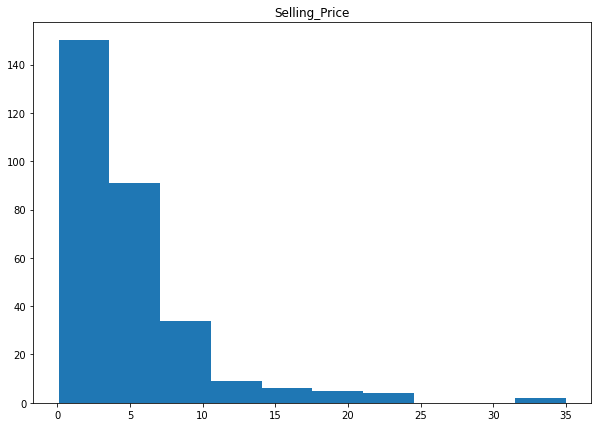

In [25]:
fig, ax = plt.subplots(figsize=(10, 7))
hdf.cols['Selling_Price'].hist(ax=ax)
plt.show()

**Observation:**

- We see a **right skewed distribution**.

- **Max** **price** can go till **35 lacs** causing the skew.

- **Majority** of the cars have price listings **under 15 lacs**.

**<h4>Question 2:** What is the distribution of classes for `Seller_Type` feature?</h4>

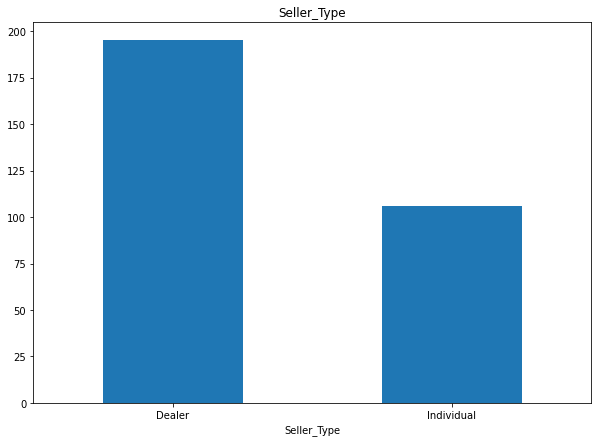

In [26]:
fig, ax = plt.subplots(figsize=(10, 7))
hdf.cols['Seller_Type'].hist(ax=ax)
plt.show()

**Observation:**

- **More than 175 sellers are dealers** and the rest are simply individuals looking for selling their cars.

**<h4>Question 3:** What is the distribution of classes for `Transmission` feature?</h4>

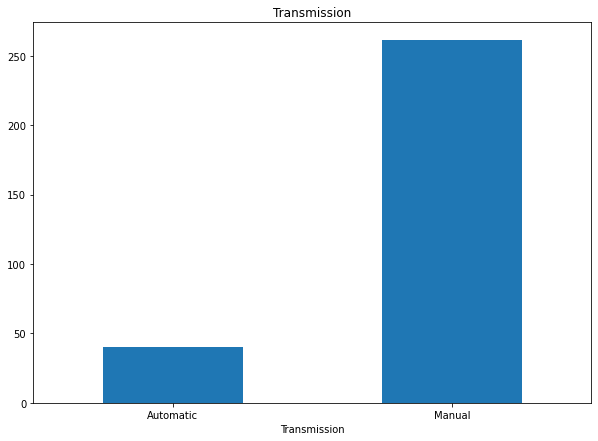

In [27]:
fig, ax = plt.subplots(figsize=(10, 7))
hdf.cols['Transmission'].hist(ax=ax)
plt.show()

**Observation:**

- Mostof the listed cars (> 250) are of **Manual transmission** type.

**<h4>Question 4:** What is the distribution of classes for `Owner` feature?</h4>

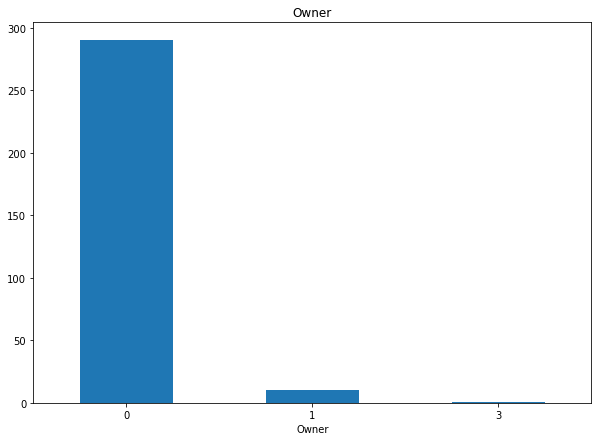

In [28]:
fig, ax = plt.subplots(figsize=(10, 7))
hdf.cols['Owner'].hist(ax=ax)
plt.show()

**Observation:**

- We have **three owner types** where **0 indicates brand new cars** (0 previous owners), **1 indicates** that the car is **second-hand**, and **3 indicates** that there were **3 owners before** the car was listed.

- There is just **one row which has Owner=3**.

## **Multivariate Analysis**

**<h4>Question 5:** Determine the relation between `Selling_Price` and `Kms_Driven` features?</h4>

- HandySpark's `scatterplot()` method can be used to plot **scatterplots**.

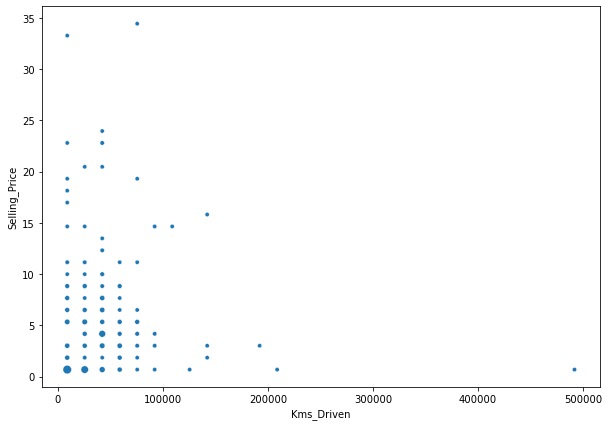

In [29]:
fig, ax = plt.subplots(figsize=(10, 7))
hdf.cols[['Kms_Driven', 'Selling_Price']].scatterplot(ax=ax)
plt.show()

**Observation:**

- We **don't observe** any linear relation between **kms driven** and **selling price**.

**<h4>Question 6:** Determine the relation between `Selling_Price` and `Present_Price` features?</h4>

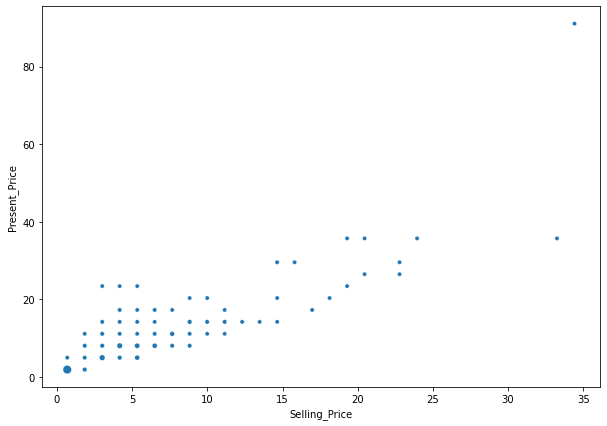

In [30]:
fig, ax = plt.subplots(figsize=(10, 7))
hdf.cols[['Selling_Price', 'Present_Price']].scatterplot(ax=ax)
plt.show()

**Observation:**

- We **observe** a slight **linear relation** between **present price** and **selling price**.

**<h4>Question 7:** Determine the relation between `Selling_Price` and `Transmission` Type features?</h4>

- HandySpark offers a unique take on **groupby like commands** with the help of stratify method which works like **split-apply-combine approach**.

- It will first **split** your HandyFrame according to the specified (discrete) columns, then it will **apply some function** to each stratum of data and finally **combine** the results back together.

This is better illustrated with an example - let’s try the stratified version of `Transmission` feature:

In [33]:
hdf.stratify(['Transmission']).cols['Selling_Price'].mean()

Transmission
Automatic    9.420000
Manual       3.931992
Name: Selling_Price, dtype: float64

- Mean value for **Manual Transmission** cars is **3.9 lacs** and it is **9.4 lacs** for **Automatic**.

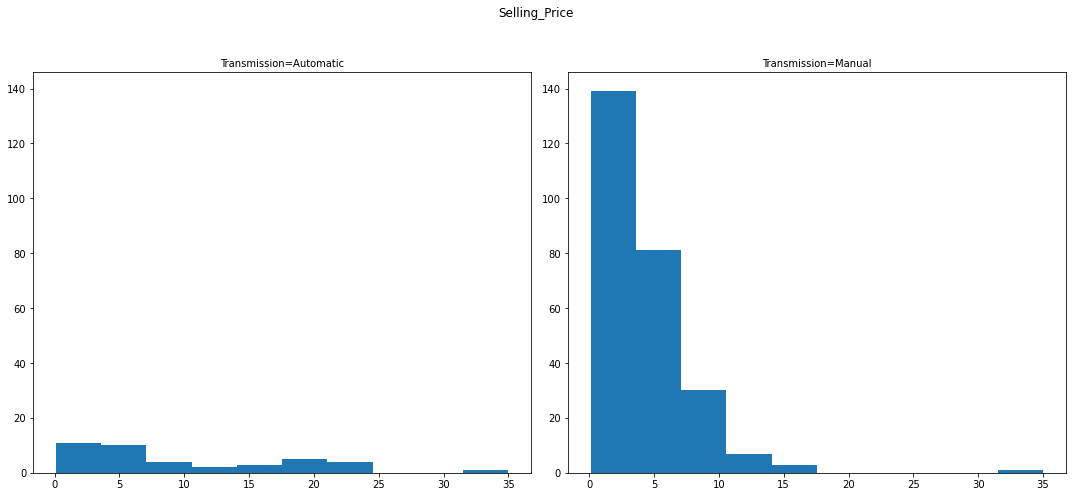

In [34]:
hdf.stratify(['Transmission']).cols['Selling_Price'].hist(figsize=(15,7))
plt.show()

**Observation:**

- **Most** of the cars are of **Manual transmission** and are available under 20 lacs.

- We can see that **equal number** of **Automatic transmission** cars are present for **all price ranges**.

## Handling missing data

HandySpark makes it very easy to spot and fill missing values.

In [35]:
hdf.isnull(ratio=True)

Car_Name         0.0
Year             0.0
Selling_Price    0.0
Present_Price    0.0
Kms_Driven       0.0
Fuel_Type        0.0
Seller_Type      0.0
Transmission     0.0
Owner            0.0
Name: missing(ratio), dtype: float64

**<h4>Question 8:** Determine the relation between `Selling_Price` and `Seller_Type` features?</h4>

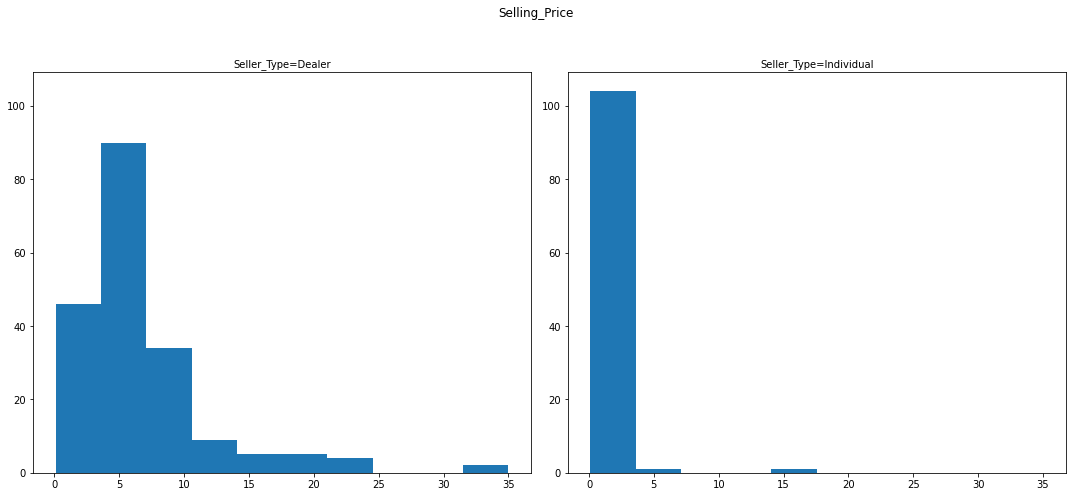

In [ ]:
hdf.stratify(['Seller_Type']).cols['Selling_Price'].hist(figsize=(15,7))
plt.show()

**Observation:**

- **Individual sellers** are selling their cars **relatively cheaply** than the proper dealers.

**<h4>Question 9:** Determine the relation between `Selling_Price` and `Fuel_Type` features?</h4>

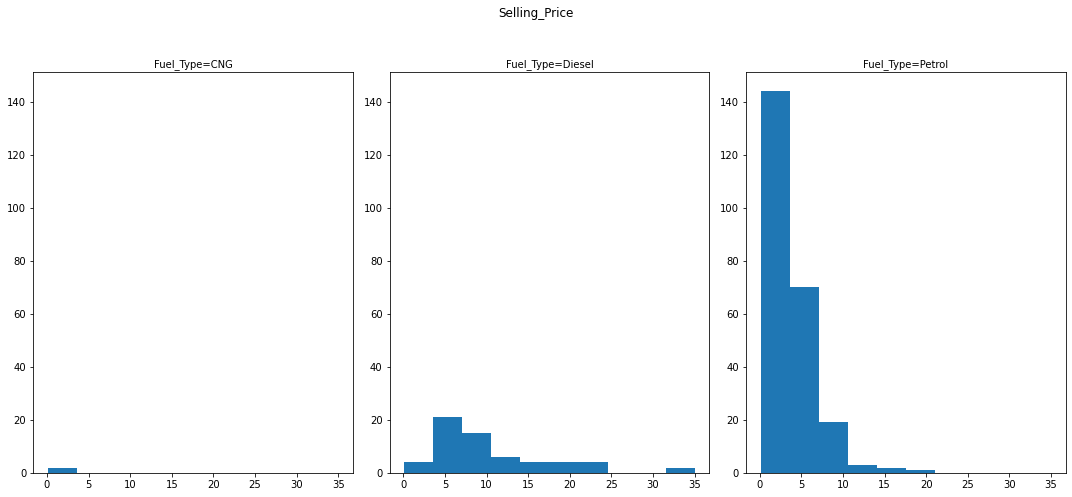

In [41]:
hdf.stratify(['Fuel_Type']).cols['Selling_Price'].hist(figsize=(15,7))
plt.show()

**Observation:**

- **CNG** fuel type cars are being sold the cheapest with their selling prices **less than 5 lacs**.

- We can then see that **petrol cars** are listed in the most with max selling price around **20 lacs**.

- **Diesel** car prices can go as high as **35 lacs**.

**<h4>Question 10:** Plot a heatmap to check for correlations between features?</h4>

In [ ]:
# The following code should work if you are using python version < 3.6
# from pyspark.ml.stat import Correlation
# vector_col = "Selling_Price"
# df_vector = featureassembler.transform(df).select(vector_col)

# # get correlation matrix
# matrix = Correlation.corr(df_vector, vector_col)
# sns.heatmap(matrix, annot=True)


INFO: Safety is ON - returning up to 1000 instances.


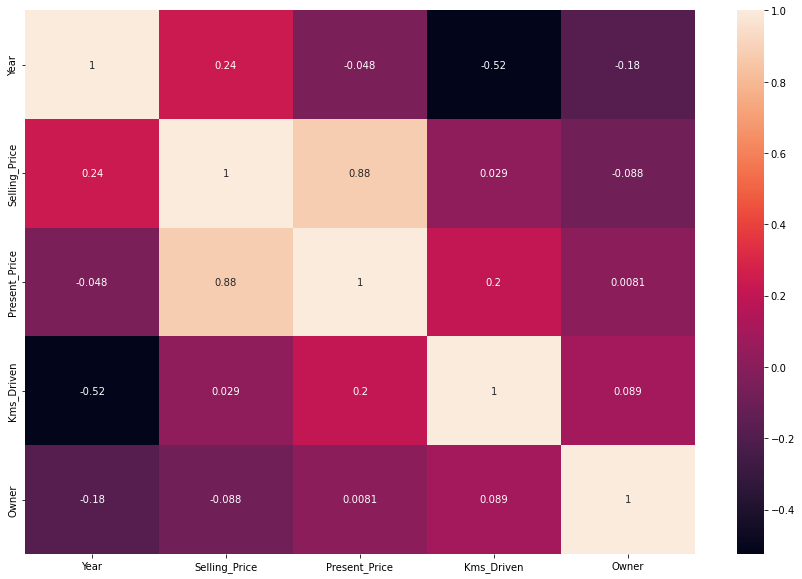

In [43]:
# Not the recommended way but this was implemented due to pyspark library incompatibility with Python 3.6 or above.
import seaborn as sns
data = hdf.toPandas()
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True)
plt.show()

**Observation:**

- Selling_Price is highly correlated with Presnet_Price and is mildly influenced by Year of make as well.

- We can see **Present_Price** is **slightly related** to **Kms_Driven** but is not influenced as much.

- **Kms_Driven** and **Year** are **inversely correlated**, indicating that some listed cars are being driven since their make year.

<a name = Section7></a>

---
# **7. Conclusion**
---

- We have finally performed **EDA on the cars data**, **extracted** some important insights that can be **useful for model building**.

- In the next article, we will use a **VectorAssembler** for **preparing our data** for machine learning model.

- This will be proceeded by a **linear regression** training and evaluation where we will observe whether the model is **able to fit the data properly** or not.